In [1]:
import config
#DB instance creation
import mysql.connector
from mysql.connector import errorcode
import requests


In [2]:
def connect_to_db():
    cnx = mysql.connector.connect(
    host=config.host, user=config.user, passwd=config.password, database=config.DB_NAME)
    cursor = cnx.cursor()
    return cnx, cursor


In [3]:
#helper method, executes a sql query and returns the fetchall results
def execute_query(query):
    cnx, c = connect_to_db()
    c.execute(query)
    result = c.fetchall()
    #close
    c.close()
    cnx.close()
    return result

In [4]:
def get_genres_from_db():
    cnx, cursor = connect_to_db()
    query = """SELECT * 
                FROM genres"""
    cursor.execute(query)
    return cursor.fetchall()

# get_genres_from_db()

In [5]:

def convert_list_from_tuples(tuple_list):
    """The movie titles are retrieved as a list of tupes, 
    return instead a list with just the title from the first half of each tuple"""
    title_list = []
    for item in tuple_list:
        title_list.append(item[0])
    return title_list
    

def get_all_movie_info():
    select_q = """
                SELECT *
                FROM movies
                """
    cnx, c = connect_to_db()
    c.execute(q)
    results = c.fetchall()
    cnx.close()
    c.close()
    return results

def get_movie_names():
    name_q = """
            SELECT title
            FROM movies"""
    cnx, c = connect_to_db()
    c.execute(name_q)
    results = c.fetchall()
    cnx.close()
    c.close()
    title_list = convert_list_from_tuples(results) 
    return title_list

# get_movie_names()
    

In [6]:
######SQL QUERIES#########

def get_most_popular_movie():
    q = """SELECT * 
            FROM movies
            ORDER BY popularity DESC
            LIMIT 5
        """
    cnx, c = connect_to_db()
    c.execute(q)
    results = c.fetchall()
    cnx.close()
    c.close()
    return results

get_most_popular_movie()

def get_genre_counts():
    q = """SELECT genres.name AS genre_name, COUNT(*) 
        FROM genre_instances
        JOIN genres
        USING (genre_id)
        GROUP BY genre_instances.genre_id
    """
    cnx, c = connect_to_db()
    c.execute(q)
    results = c.fetchall()
    c.close()
    cnx.close()
    return results

# get_genre_counts()

In [126]:
def get_most_popular_genres():
    q = """
        SELECT genres.name, AVG(popularity) AS avg_popularity
        FROM genre_instances
        JOIN genres 
        USING (genre_id)
        JOIN movies
        USING (movie_id)
        GROUP BY genre_id
        ORDER BY avg_popularity DESC;
        """
    return execute_query(q)

# get_most_popular_genres()

In [127]:
def get_movies_table():
    q = """
        SELECT * 
        FROM movies
        ORDER BY popularity DESC
        """
    return execute_query(q)

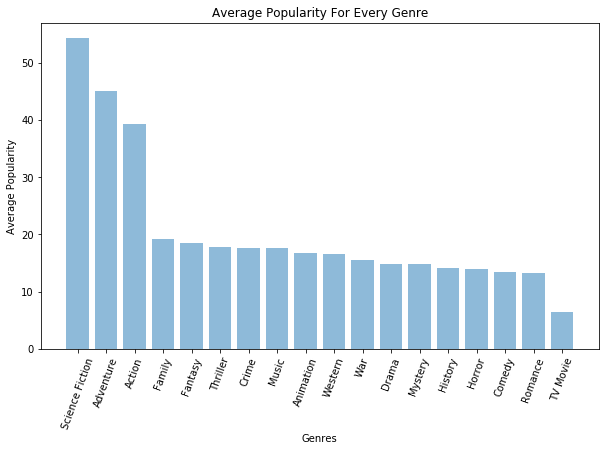

In [51]:
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline


# popular_tuple = get_most_popular_genres()
# genres = [item[0] for item in popular_tuple]
# avg_pop = [item[1] for item in popular_tuple]

def bar_chart(x, y, xlabel=None, ylabel=None, title=None):
    """This function creates bar charts. It must recieve the x and y values to plot.
       optional insertions are: add xlabel, ylabel and title."""
    plt.figure(figsize=(10,6))
    plt.bar(x, y, align='center', alpha=0.5)
    #give the x ticks a slight rotation in case the data is highly populated
    plt.xticks(x, rotation=70)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    return

bar_chart(genres, avg_pop, 
          'Genres', 'Average Popularity', 
          'Average Popularity For Every Genre')

[[1.         0.11863972]
 [0.11863972 1.        ]]


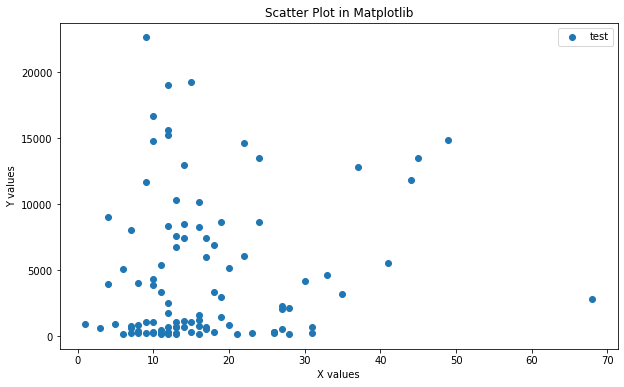

In [139]:
import numpy as np
query_tuple = get_movies_table()


# title = [item[1] for item in query_tuple]
# popu = [item[2] for item in query_tuple]
# re_date = [item[3] for item in query_tuple]
# vote_count = [item[4] for item in query_tuple]
# vote_avg = [item[5] for item in query_tuple]
# title_length = [len(item) for item in title]
   
test_list = []
for ind in range(len(popu)):
    test_dict = {'vote_count': vote_count[ind],
                 'title_length': title_length[ind]}
    test_list.append(test_dict)

x = []
y = []
for dictionary in test_list:
    y.append(dictionary['vote_count'])
    x.append(dictionary['title_length'])
    
plt.figure(figsize=(10,6))
plt.scatter(x, y, label = "test" )
# Set x and y axes lvote_countabels
plt.xlabel('X values')
plt.ylabel('Y values')

print(np.corrcoef(x,y))
plt.title('Scatter Plot in Matplotlib')
plt.legend()
plt.show()



[{'popularity': 108.68, 'title_length': 22},
 {'popularity': 79.894, 'title_length': 9},
 {'popularity': 55.09, 'title_length': 33},
 {'popularity': 47.206, 'title_length': 49},
 {'popularity': 40.246, 'title_length': 15},
 {'popularity': 39.88, 'title_length': 12},
 {'popularity': 37.843, 'title_length': 45},
 {'popularity': 37.615, 'title_length': 9},
 {'popularity': 35.721, 'title_length': 10},
 {'popularity': 33.617, 'title_length': 10},
 {'popularity': 32.412, 'title_length': 12},
 {'popularity': 31.66, 'title_length': 37},
 {'popularity': 31.392, 'title_length': 15},
 {'popularity': 30.651, 'title_length': 24},
 {'popularity': 30.317, 'title_length': 16},
 {'popularity': 29.973, 'title_length': 44},
 {'popularity': 29.937, 'title_length': 4},
 {'popularity': 28.964, 'title_length': 13},
 {'popularity': 28.181, 'title_length': 10},
 {'popularity': 27.512, 'title_length': 12},
 {'popularity': 26.49, 'title_length': 22},
 {'popularity': 26.065, 'title_length': 8},
 {'popularity': 25